# Chapter 6: How to clean the data

In [1]:
import pandas as pd

## What the info() method can tell you

In [2]:
polls = pd.read_csv('../../data/president_polls_2016.csv')

In [3]:
polls.info(verbose=True, memory_usage='deep', show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cycle             12624 non-null  int64  
 1   branch            12624 non-null  object 
 2   type              12624 non-null  object 
 3   matchup           12624 non-null  object 
 4   forecastdate      12624 non-null  object 
 5   state             12624 non-null  object 
 6   startdate         12624 non-null  object 
 7   enddate           12624 non-null  object 
 8   pollster          12624 non-null  object 
 9   grade             11337 non-null  object 
 10  samplesize        12621 non-null  float64
 11  population        12624 non-null  object 
 12  poll_wt           12624 non-null  float64
 13  rawpoll_clinton   12624 non-null  float64
 14  rawpoll_trump     12624 non-null  float64
 15  rawpoll_johnson   8397 non-null   float64
 16  rawpoll_mcmullin  90 non-null     float6

In [4]:
# NOTE: This may take a long time to run
jobs = pd.read_excel('../../data/oesm18all/all_data_M_2018.xlsx')

In [5]:
jobs.info(verbose=True, memory_usage='deep', show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403895 entries, 0 to 403894
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   area          403895 non-null  int64  
 1   area_title    403895 non-null  object 
 2   area_type     403895 non-null  int64  
 3   naics         403895 non-null  object 
 4   naics_title   403895 non-null  object 
 5   i_group       403895 non-null  object 
 6   own_code      403895 non-null  int64  
 7   occ_code      403895 non-null  object 
 8   occ_title     403895 non-null  object 
 9   o_group       403895 non-null  object 
 10  tot_emp       403895 non-null  object 
 11  emp_prse      403895 non-null  object 
 12  jobs_1000     227944 non-null  object 
 13  loc_quotient  227944 non-null  object 
 14  pct_total     169080 non-null  object 
 15  h_mean        403895 non-null  object 
 16  a_mean        403895 non-null  object 
 17  mean_prse     403895 non-null  object 
 18  h_pc

## What the unique values can tell you

In [6]:
polls.nunique()

cycle                   1
branch                  1
type                    3
matchup                 1
forecastdate            1
state                  57
startdate             352
enddate               345
pollster              196
grade                  10
samplesize           1766
population              4
poll_wt              4399
rawpoll_clinton      1312
rawpoll_trump        1385
rawpoll_johnson       584
rawpoll_mcmullin       16
adjpoll_clinton     12569
adjpoll_trump       12582
adjpoll_johnson      6629
adjpoll_mcmullin       57
multiversions           1
url                  1304
poll_id              4208
question_id          4208
createddate           222
timestamp               3
dtype: int64

In [7]:
polls.apply(pd.unique)

cycle                                                          [2016]
branch                                                    [President]
type                               [polls-plus, now-cast, polls-only]
matchup                               [Clinton vs. Trump vs. Johnson]
forecastdate                                                [11/8/16]
state               [U.S., New Mexico, Virginia, Iowa, Wisconsin, ...
startdate           [11/3/2016, 11/1/2016, 11/2/2016, 11/4/2016, 1...
enddate             [11/6/2016, 11/7/2016, 11/5/2016, 11/4/2016, 1...
pollster            [ABC News/Washington Post, Google Consumer Sur...
grade                       [A+, B, A-, B-, A, nan, B+, C+, C-, C, D]
samplesize          [2220.0, 26574.0, 2195.0, 3677.0, 16639.0, 129...
population                                             [lv, rv, a, v]
poll_wt             [8.720654, 7.628472, 6.424334, 6.087135, 5.316...
rawpoll_clinton     [47.0, 38.03, 42.0, 45.0, 48.0, 44.0, 46.0, 41...
rawpoll_trump       

## What the value counts can tell you

In [8]:
polls.state.value_counts().head(4)

U.S.              3318
Florida            444
North Carolina     375
Pennsylvania       375
Name: state, dtype: int64

In [9]:
polls.state.value_counts(normalize=True).head(4)

U.S.              0.262833
Florida           0.035171
North Carolina    0.029705
Pennsylvania      0.029705
Name: state, dtype: float64

In [10]:
polls.multiversions.value_counts(dropna=False)

NaN    12588
*         36
Name: multiversions, dtype: int64

In [11]:
polls[['state','grade']].value_counts()

state          grade
U.S.           A-       1215
               C+        546
               B         162
               C-        126
               A+        114
                        ... 
Nebraska CD-1  B           3
Indiana        A           3
Nebraska CD-2  B           3
Missouri       A           3
Mississippi    C           3
Length: 321, dtype: int64

## How to drop rows

In [12]:
#polls = polls[polls.type == 'now-cast']

In [13]:
polls = polls.query('type == "now-cast"')

In [14]:
import sqlite3
fires_con = sqlite3.connect('../../data/Data/FPA_FOD_20170508.sqlite')
fires = pd.read_sql_query(
    '''SELECT STATE, FIRE_YEAR, DATETIME(DISCOVERY_DATE) AS DISCOVERY_DATE,
              FIRE_NAME, FIRE_SIZE, LATITUDE, LONGITUDE
       FROM Fires''', fires_con)
fires.columns = fires.columns.str.lower()

In [15]:
fires[fires.duplicated(keep=False)]

,state,fire_year,discovery_date,fire_name,fire_size,latitude,longitude
48642,CA,1992,1992-06-28 00:00:00,None,0.1,36.021667,-118.805000
48644,CA,1992,1992-06-28 00:00:00,None,0.1,36.021667,-118.805000
71593,WA,1994,1994-08-06 00:00:00,None,0.1,46.441667,-121.783333
189841,WA,1992,1992-09-06 00:00:00,None,0.1,47.908200,-117.992700
193186,MT,1992,1992-08-14 00:00:00,None,2.0,45.083300,-107.534000
...,...,...,...,...,...,...,...
1871739,CA,2015,2015-12-20 00:00:00,DEER HOLLOW WY / PEPPERCO,0.1,33.458184,-117.086954
1871904,CA,2015,2015-12-20 00:00:00,DEER HOLLOW WY / PEPPERCO,0.1,33.458184,-117.086954
1872000,CA,2015,2015-12-20 00:00:00,DEER HOLLOW WY / PEPPERCO,0.1,33.458184,-117.086954
1876440,CA,2015,2015-05-19 00:00:00,None,1.0,34.003623,-117.167418


In [16]:
fires.drop_duplicates(keep='first', inplace=True)

## How to drop columns

In [17]:
polls.nunique()

cycle                  1
branch                 1
type                   1
matchup                1
forecastdate           1
state                 57
startdate            352
enddate              345
pollster             196
grade                 10
samplesize          1766
population             4
poll_wt             3894
rawpoll_clinton     1312
rawpoll_trump       1385
rawpoll_johnson      584
rawpoll_mcmullin      16
adjpoll_clinton     4202
adjpoll_trump       4199
adjpoll_johnson     2210
adjpoll_mcmullin      30
multiversions          1
url                 1304
poll_id             4208
question_id         4208
createddate          222
timestamp              1
dtype: int64

In [18]:
#polls = polls.drop(columns=['cycle','forecastdate'])

In [19]:
polls.drop(columns=['cycle','forecastdate'], errors='raise', inplace=True)

## How to rename columns

In [20]:
polls = polls.rename(columns={
    'rawpoll_clinton':'clinton_pct',
    'rawpoll_trump':'trump_pct'})

In [21]:
polls_names_dict = {'rawpoll_clinton':'clinton_pct',
                    'rawpoll_trump':'trump_pct'}
polls.rename(columns = polls_names_dict, inplace = True)

In [22]:
polls.columns = polls.columns.str.replace('_pct','')

In [23]:
jobs.columns = jobs.columns \
    .str.replace('^a_','annual_') \
    .str.replace('^h_','hourly_') \
    .str.replace('_pct','_percent')

<ipython-input-23-13880b04ae0c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  jobs.columns = jobs.columns \


## How to find missing values

In [24]:
mortality_data = pd.read_csv('mortality_missing_values.csv')

In [25]:
mortality_data.head(5)

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,NaN
3,1903.0,01-04 Years,1542.1
4,NaN,01-04 Years,NaN


In [26]:
mortality_data.loc[5:9]

,Year,AgeGroup,DeathRate
5,1905.0,01-04 Years,1498.9
6,NaN,01-04 Years,NaN
7,1907.0,01-04 Years,NaN
8,1908.0,01-04 Years,1396.8
9,1909.0,01-04 Years,1348.9


In [27]:
missing_count = mortality_data.shape[0] - mortality_data.count()
print(missing_count)

Year         3
AgeGroup     0
DeathRate    4
dtype: int64


In [28]:
mortality_data[mortality_data.isnull().any(axis=1)]

,Year,AgeGroup,DeathRate
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,NaN
4,NaN,01-04 Years,NaN
6,NaN,01-04 Years,NaN
7,1907.0,01-04 Years,NaN


In [29]:
mortality_data[mortality_data.DeathRate.isnull()]

,Year,AgeGroup,DeathRate
2,1902.0,01-04 Years,NaN
4,NaN,01-04 Years,NaN
6,NaN,01-04 Years,NaN
7,1907.0,01-04 Years,NaN


In [30]:
mortality_data[mortality_data.DeathRate.notnull()]

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
3,1903.0,01-04 Years,1542.1
5,1905.0,01-04 Years,1498.9
8,1908.0,01-04 Years,1396.8
...,...,...,...
471,2014.0,15-19 Years,45.5
472,2015.0,15-19 Years,48.3
473,2016.0,15-19 Years,51.2
474,2017.0,15-19 Years,51.5


## How to drop rows with missing values

In [31]:
mortality_data = mortality_data.dropna()
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
3,1903.0,01-04 Years,1542.1
5,1905.0,01-04 Years,1498.9
8,1908.0,01-04 Years,1396.8
9,1909.0,01-04 Years,1348.9


In [32]:
mortality_data.dropna(thresh=2, inplace=True)

In [33]:
mortality_data.dropna(subset=['DeathRate'], inplace=True)

## How to fill missing values

In [34]:
mortality_data = pd.read_csv('mortality_missing_values.csv')
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,NaN
3,1903.0,01-04 Years,1542.1
4,NaN,01-04 Years,NaN


In [35]:
mortality_data.DeathRate.fillna(value=mortality_data.DeathRate.mean(), inplace=True)
mortality_data.head(4)

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.800000
1,NaN,01-04 Years,1695.000000
2,1902.0,01-04 Years,181.221186
3,1903.0,01-04 Years,1542.100000


In [36]:
mortality_data = pd.read_csv('mortality_missing_values.csv')
mortality_data.fillna(method = 'ffill', limit=2, inplace=True)
mortality_data.head(4)

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,1900.0,01-04 Years,1695.0
2,1902.0,01-04 Years,1695.0
3,1903.0,01-04 Years,1542.1


In [37]:
mortality_data = pd.read_csv('mortality_missing_values.csv')
mortality_data = mortality_data.interpolate()
mortality_data.head(4)

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.80
1,1901.0,01-04 Years,1695.00
2,1902.0,01-04 Years,1618.55
3,1903.0,01-04 Years,1542.10


## How to find date and number columns that are imported as objects

In [38]:
polls.select_dtypes('object').head(2)

,branch,type,matchup,state,startdate,enddate,pollster,grade,population,multiversions,url,createddate,timestamp
4208,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,lv,NaN,https://www.washingtonpost.com/news/the-fix/wp...,11/7/16,09:24:53 8 Nov 2016
4209,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,lv,NaN,https://datastudio.google.com/u/0/#/org//repor...,11/7/16,09:24:53 8 Nov 2016


In [39]:
jobs.select_dtypes('object').head(2)

,area_title,naics,naics_title,i_group,occ_code,occ_title,o_group,tot_emp,emp_prse,jobs_1000,...,hourly_median,hourly_percent75,hourly_percent90,annual_percent10,annual_percent25,annual_median,annual_percent75,annual_percent90,annual,hourly
0,U.S.,000000,Cross-industry,cross-industry,00-0000,All Occupations,total,144733270,0.1,NaN,...,18.58,30.06,47.31,20690,25740,38640,62510,98410,NaN,NaN
1,U.S.,000000,Cross-industry,cross-industry,11-0000,Management Occupations,major,7616650,0.2,NaN,...,50.11,72.93,#,49260,70880,104240,151700,#,NaN,NaN


## How to convert date and time strings to the datetime data type

In [40]:
date_cols = ['startdate','enddate','createddate','timestamp']
polls[date_cols].head(2)

,startdate,enddate,createddate,timestamp
4208,11/3/2016,11/6/2016,11/7/16,09:24:53 8 Nov 2016
4209,11/1/2016,11/7/2016,11/7/16,09:24:53 8 Nov 2016


In [41]:
polls[date_cols] = polls[date_cols].apply(pd.to_datetime)
polls[date_cols].head(2)

,startdate,enddate,createddate,timestamp
4208,2016-11-03,2016-11-06,2016-11-07,2016-11-08 09:24:53
4209,2016-11-01,2016-11-07,2016-11-07,2016-11-08 09:24:53


In [42]:
polls['startdate'] = polls.startdate.dt.strftime("%m/%d/%Y")
polls['enddate'] = polls.enddate.dt.strftime("%m-%d-%y")
polls[date_cols].head(2)

,startdate,enddate,createddate,timestamp
4208,11/03/2016,11-06-16,2016-11-07,2016-11-08 09:24:53
4209,11/01/2016,11-07-16,2016-11-07,2016-11-08 09:24:53


## How to convert object columns to numeric data types

In [43]:
# pd.to_numeric(jobs.tot_emp)

In [44]:
jobs.tot_emp.tail(3)

403892    170
403893    130
403894     **
Name: tot_emp, dtype: object

In [45]:
pd.to_numeric(jobs.tot_emp, errors='coerce').tail(3)

403892    170.0
403893    130.0
403894      NaN
Name: tot_emp, dtype: float64

## How to work with the category data type

In [46]:
fires.state = fires.state.astype('category')

In [47]:
statCounts = pd.read_stata('../../data/GSS7218_R3.DTA', columns=['year','wrkstat'])

In [48]:
filteredStatCounts = statCounts.query(
    'wrkstat in ["working fulltime","working parttime","retired"]')
filteredStatCounts.wrkstat.value_counts()

working fulltime    31892
retired              9121
working parttime     6719
temp not working        0
unempl, laid off        0
school                  0
keeping house           0
other                   0
Name: wrkstat, dtype: int64

In [49]:
# produces a warning that you'll learn about in chapter 7
filteredStatCounts['wrkstat'] = \
    filteredStatCounts.wrkstat.cat.remove_unused_categories()
filteredStatCounts.wrkstat.value_counts()

<ipython-input-49-f28117e3bc67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredStatCounts['wrkstat'] = \


working fulltime    31892
retired              9121
working parttime     6719
Name: wrkstat, dtype: int64

## How to replace invalid values and convert a column’s data type

In [50]:
import numpy as np
jobs.tot_emp.replace(to_replace=['*','**'], value=[np.nan,np.nan]) # ,inplace=True)

0         144733270.0
1           7616650.0
2           2535640.0
3            195530.0
4            195530.0
             ...     
403890           40.0
403891          170.0
403892          170.0
403893          130.0
403894            NaN
Name: tot_emp, Length: 403895, dtype: float64

In [51]:
jobs.tot_emp.replace({'*':np.nan, '**':np.nan}, inplace=True)

In [52]:
jobs.hourly_median = jobs.hourly_median.replace(to_replace='#', value = 100)

In [53]:
jobs.hourly.replace(to_replace=np.nan, value=False, inplace=True)

## How to fix data type problems when you import the data

In [54]:
date_cols = ['forecastdate','startdate','enddate','createddate','timestamp']

In [55]:
polls = pd.read_csv('../../data/president_polls_2016.csv')
polls[date_cols].head(3)

,forecastdate,startdate,enddate,createddate,timestamp
0,11/8/16,11/3/2016,11/6/2016,11/7/16,09:35:33 8 Nov 2016
1,11/8/16,11/1/2016,11/7/2016,11/7/16,09:35:33 8 Nov 2016
2,11/8/16,11/2/2016,11/6/2016,11/8/16,09:35:33 8 Nov 2016


In [56]:
polls_new = pd.read_csv('../../data/president_polls_2016.csv', parse_dates=date_cols)
polls_new[date_cols].head(3)

,forecastdate,startdate,enddate,createddate,timestamp
0,2016-11-08,2016-11-03,2016-11-06,2016-11-07,2016-11-08 09:35:33
1,2016-11-08,2016-11-01,2016-11-07,2016-11-07,2016-11-08 09:35:33
2,2016-11-08,2016-11-02,2016-11-06,2016-11-08,2016-11-08 09:35:33


## How to find outliers

In [57]:
mortality_data = pd.read_pickle('mortality_cleaned.pkl')

In [58]:
mortality_group = mortality_data.query('AgeGroup == "15-19 Years"')
mortality_group.head(3)

,Year,AgeGroup,DeathRate
357,1900,15-19 Years,484.8
358,1901,15-19 Years,454.4
359,1902,15-19 Years,421.5


In [59]:
# save DataFrame for later use
mortality_group.to_pickle('mortality_group.pkl')

In [60]:
mortality_group.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,119.0,1959.00000,34.496377,1900.0,1929.50,1959.0,1988.50,2018.0
DeathRate,119.0,177.37479,138.362290,44.8,85.45,106.9,283.65,777.4


<AxesSubplot:xlabel='Year'>

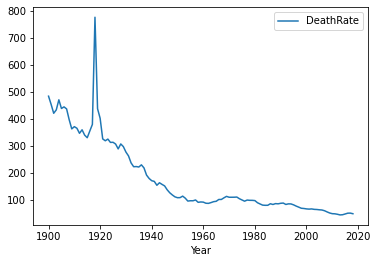

In [61]:
mortality_group.plot(x='Year', y='DeathRate')

In [62]:
mortality_group.query('DeathRate > 500')

,Year,AgeGroup,DeathRate
375,1918,15-19 Years,777.4


## How to fix outliers

In [63]:
mortality_group = pd.read_pickle('mortality_group.pkl')

mortality_group = mortality_group.query('DeathRate <= 500')

In [64]:
mortality_group = pd.read_pickle('mortality_group.pkl')

mortality_group.loc[mortality_group.DeathRate > 500, 'DeathRate'] = 450

<AxesSubplot:xlabel='Year'>

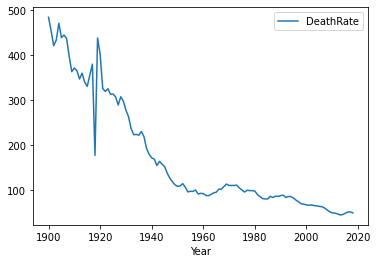

In [65]:
mortality_group = pd.read_pickle('mortality_group.pkl')

mortality_group.loc[mortality_group.DeathRate > 500, 'DeathRate'] \
    = mortality_group.DeathRate.mean()
mortality_group.plot(x='Year', y='DeathRate')

<AxesSubplot:xlabel='Year'>

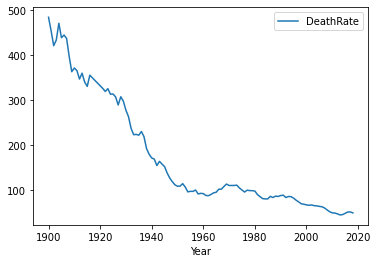

In [66]:
mortality_group = pd.read_pickle('mortality_group.pkl')

mortality_group.loc[mortality_group.Year.isin([1917,1918,1919,1920]),
                    'DeathRate'] = None
mortality_group = mortality_group.interpolate()
mortality_group.plot(x='Year', y='DeathRate')